# House Rocket Project - Data Analysis

## Dataset Description



### The variable on original Dataset goes as follows:

| Variable | Description |
| --- | --- |
| id  | Unique ID for each home sold |
| date  | Date of the home sale |
| price  | Price of each home sold |
| bedrooms  | Number of bedrooms |
| bathrooms  | Number of bathrooms, where .5 accounts for a room with a toilet but no shower |
| sqft_living  | Square footage of the apartments interior living space |
| sqft_lot  | Square footage of the land space |
| floors  | Number of floors |
| waterfront  | A dummy variable for whether the apartment was overlooking the waterfront or not |
| view  | An index from 0 to 4 of how good the view of the property was |
| condition  | An index from 1 to 5 on the condition of the apartment |
| grade  | An index from 1 to 13, where 1 - 3 falls short of building construction and design, 7 has an average level of construction and design, and 11 - 13 have a high quality level of construction and design. |
| sqft_above  | The square footage of the interior housing space that is above ground level |
| sqft_basement  | The square footage of the interior housing space that is below ground level |
| yr_built  | The year the house was initially built |
| yr_renovated  | The year of the house’s last renovation |
| zipcode  | What zipcode area the house is in |
| lat  | Lattitude |
| long  | Longitude |
| sqft_living15  | The square footage of interior housing living space for the nearest 15 neighbors |
| sqft_lot15  | The square footage of the land lots of the nearest 15 neighbors |

## 1. Import Libs

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import warnings

### 1.1 Import setings

In [ ]:
def jupyter_settings():
    %matplotlib inline
    plt.style.use('Solarize_Light2')
    plt.rcParams['figure.figsize'] = [12,6]
    plt.rcParams['font.size'] = 12
    pd.options.display.float_format = '{:,.2f}'.format
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    sns.set()
    plt.style.use('seaborn')
    warnings.filterwarnings('ignore')
jupyter_settings()

## 2. Data Import

In [ ]:
# Reading CSV
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900.00",3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,"538,000.00",3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,"180,000.00",2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,"604,000.00",4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,"510,000.00",3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
# duplicates
len(data)-len(data.drop_duplicates())

0

In [ ]:
# duplicates by id
len(data)-len(data.drop_duplicates(subset='id'))

177

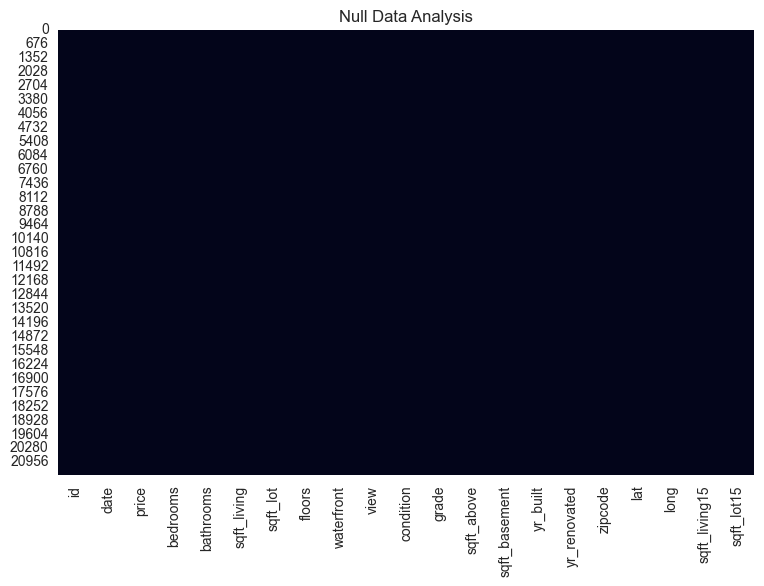

In [ ]:
plt.title('Null Data Analysis')
sns.heatmap(data.isnull(),cbar = False);

### Observations
- Dataset has 21613 records
- Dataset doesn't have 'null values'
- Dataset has no duplicate record, but 177 duplicated id's
- Dataset has some columns with wrong types

## 3. Data Cleaning

In [ ]:
# Convert date column to date type
data ['date'] = pd.to_datetime(data ['date'],format='%Y-%m-%d')

In [ ]:
# drop duplicates on id, and keep the last record (by date)
data = data.sort_values(by='date').drop_duplicates(subset='id',keep='first')
data =data.reset_index(drop=True)

### 3.1 Converting column types

In [ ]:
data['waterfront'] = pd.Categorical(data['waterfront'])
data['waterfront'] = data['waterfront'].cat.rename_categories({0:'no',1:'yes'})

In [ ]:
data['condition'] = pd.Categorical(data['condition'])
data['condition'] = data['condition'].cat.rename_categories({1:'bad',2:'fair',3:'average',4:'good',5:'excelent'})

In [ ]:
data['view'] = pd.Categorical(data['view'])
data['view'] = data['view'].cat.rename_categories({0:'no view',1:'fair',2:'average',3:'good',4:'excelent'})

In [ ]:
data['lat'] = pd.Categorical(data['lat'])
data['long'] = pd.Categorical(data['long'])

In [ ]:
data.grade.unique()

array([ 9,  8,  7,  6, 10, 12, 11,  5,  4, 13,  1,  3], dtype=int64)

In [ ]:
data['grade'] = data['grade'].apply(lambda x:   "poor" if x <= 3 else
                                "fair" if x<= 5 else
                                "average" if x <= 8 else
                                "good" if x <=10 else
                                "excelent" if x<=13 else 'na' )
data['grade'] = pd.Categorical(data['grade'])

### 3.2 Overview

In [ ]:
data.select_dtypes('category').describe().T

,count,unique,top,freq
waterfront,21436,2,no,21273
view,21436,5,no view,19320
condition,21436,5,average,13911
grade,21436,5,average,16935
lat,"21,436.00","5,034.00",47.66,17.00
long,"21,436.00",752.00,-122.29,114.00


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,"21,436.00","4,580,765,328.18","2,876,589,633.67","1,000,102.00","2,123,700,078.75","3,904,921,185.00","7,308,675,062.50","9,900,000,190.00"
price,"21,436.00","540,529.29","367,689.30","75,000.00","322,150.00","450,000.00","645,000.00","7,700,000.00"
bedrooms,"21,436.00",3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,"21,436.00",2.12,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,"21,436.00","2,082.70",919.15,290.00,"1,430.00","1,920.00","2,550.00","13,540.00"
sqft_lot,"21,436.00","15,135.64","41,538.62",520.00,"5,040.00","7,614.00","10,696.25","1,651,359.00"
floors,"21,436.00",1.50,0.54,1.00,1.00,1.50,2.00,3.50
sqft_above,"21,436.00","1,790.96",829.03,290.00,"1,200.00","1,560.00","2,220.00","9,410.00"
sqft_basement,"21,436.00",291.74,442.78,0.00,0.00,0.00,560.00,"4,820.00"
yr_built,"21,436.00","1,971.10",29.39,"1,900.00","1,952.00","1,975.00","1,997.00","2,015.00"


In [ ]:
data.loc[data['bedrooms']==33].T

,3604
id,2402100895
date,2014-06-25 00:00:00
price,"640,000.00"
bedrooms,33
bathrooms,1.75
sqft_living,1620
sqft_lot,6000
floors,1.00
waterfront,no
view,no view


#### **Observation**
- Looks like this register is a typo. It's unlikely that a house with 33 bedrooms would have only 1-2 bathroom.
- We will assume that should be 3 bedrooms.

In [ ]:
# Replace bedrooms 33 to 3 bedrooms
data.loc[data['bedrooms']==33].replace({33:3})

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3604,2402100895,2014-06-25,"640,000.00",3,1.75,1620,6000,1.00,no,no view,excelent,average,1040,580,1947,0,98103,47.69,-122.33,1330,4700


## 4. Feature Engeering - Create the following columns:
    4.1 'Season' of the year which the property was sold
    4.2 'half_bathroom' (bathrooms without shower)
    4.3 'Complete_bathrooms' (bathrooms with shower)
    4.4 'Last_maintenance' , If ‘yr_renovate’ is 0, then assume the last_maintenance it’s the same as ‘yr_built’

### 4.1 'Season' of the year which the property was sold.
    - Spring starts on March 21st
    - Summer starts on June 21st
    - Fall starts on September 23rd
    - Winter starts on December 21st

In [ ]:
data['day'] = pd.DatetimeIndex(data['date']).day
data['month'] = pd.DatetimeIndex(data['date']).month

In [ ]:
# Function to set the season accord to month and day
def season(month,day):
    # ------ winter -----------
    # Dec and >= 21st
    if month == 12 and day >= 21:
        return 'winter'
    
    # Jan and Feb
    if month == 1 or month ==2:
        return 'winter'

    # Mar and < 21st
    if month == 3 and day <21:
        return 'winter'
    
    # ------ Spring -----------

    # Mar and >= 21st
    if month == 3 and day >= 21:
        return 'spring'
    
    # Apr and May
    if month == 4 or month ==5:
        return 'spring'
    
    # Jun and < 21st
    if month == 6 and day <21:
        return 'spring'
    
    # ------ Summer -----------

    # Jun and >= 21st
    if month == 6 and day >= 21:
        return 'summer'
    # Jul and Aug
    if month == 7 or month ==8:
        return 'summer'
    
    # Sep and < 23st
    if month == 9 and day <23:
        return 'summer'
    
    # ------ Fall -----------
    
    # Jun and >= 23st
    if month == 9 and day >= 23:
        return 'fall'

    # Oct and Nov
    if month == 10 or month ==11:
        return 'fall'
    # Dec and <21st
    if month == 12 and day <21:
        return 'fall'

In [ ]:
# Functions Test
season(month=12,day = 23)

'winter'

In [ ]:
# Creating a new feature
data['season'] = data[['month','day']].apply(lambda x: season(month = x['month'],day = x['day']),axis = 1)

In [ ]:
data.season.value_counts()

spring    6749
summer    6135
fall      4900
winter    3652
Name: season, dtype: int64

In [ ]:
data.drop(columns=['month','day'],inplace=True)

In [ ]:
data['season'] = pd.Categorical(data['season'])

### 4.2 'half_bathroom' (bathrooms without shower) &&
### 4.3 'Complete_bathrooms' (bathrooms with shower)

In [ ]:
df = pd.DataFrame(data['bathrooms'].astype(str).str.split('.',expand=True))

In [ ]:
#df = [data['bathrooms'].astype(str).str.split('.',expand=False)]
data['complete_bathrooms'] = np.int64(df[0])
data['half_bathroom'] = df[1]

In [ ]:
# Convert half_bathroom 
data['half_bathroom'] = data['half_bathroom'].apply(lambda x: "no" if x=="0" else "yes")
data['half_bathroom']  = pd.Categorical(data['half_bathroom'])

In [ ]:
# Drop properties which doesn't have a complete bathroom
data = data.loc[data['complete_bathrooms']!=0]

In [ ]:
data = data.reset_index(drop=True)

### 4.4 'Last_maintenance' , If ‘yr_renovate’ is 0, then assume the last_maintenance it’s the same as ‘yr_built’

In [ ]:
def last_maintenance(built,renovated):
    if renovated == 0:
        return built
    else:
        return renovated

In [ ]:
data['last_maintenance'] = data[['yr_built','yr_renovated']].apply(lambda x: last_maintenance(built = x.yr_built,renovated =  x.yr_renovated),axis = 1)

## 5. Exploratory Data Analysis (EDA)

### 5.1. Quantity Variables

#### 5.1.1. Bathrooms, Bedrooms and Floors

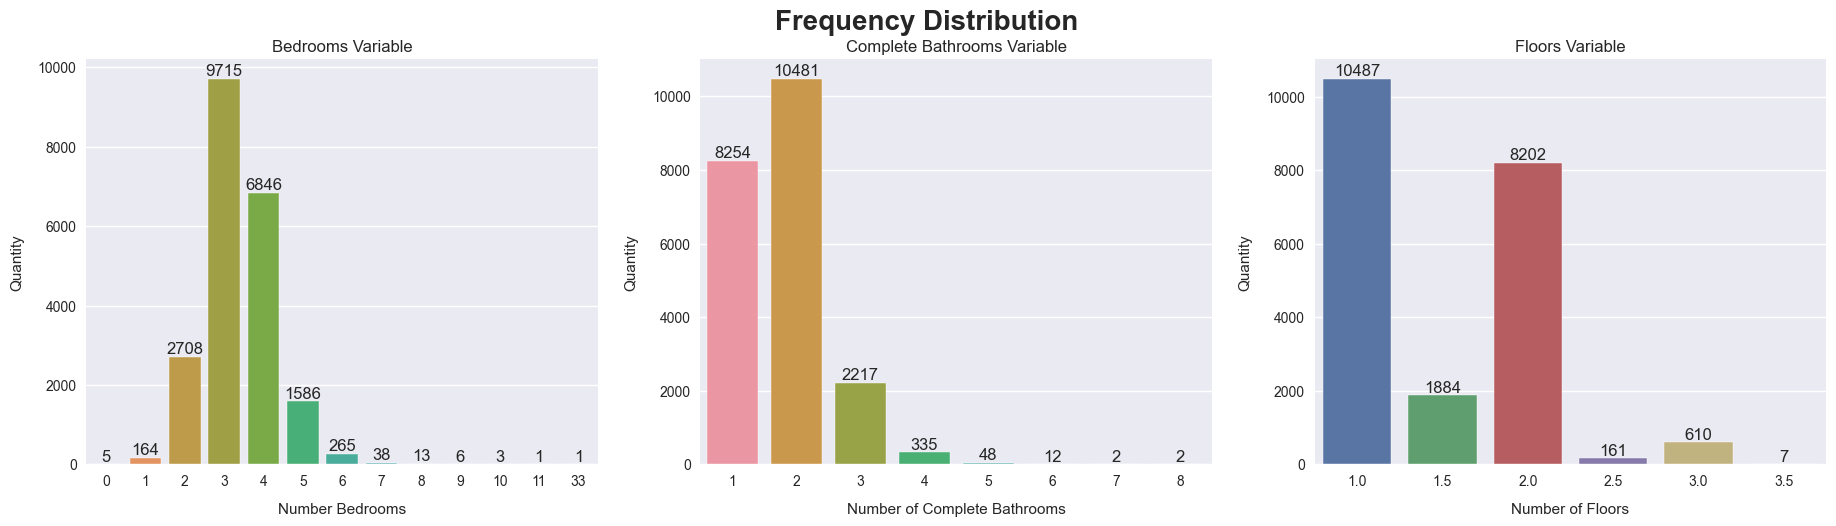

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Frequency Distribution',fontsize = 20,fontweight =600)
plt.subplots_adjust(hspace=0.6)
# Bedrooms Graphic
ax[0].set_title('Bedrooms Variable')
gr = sns.countplot(ax=ax[0], x='bedrooms', data=data)
gr.bar_label(gr.containers[0], label_type='edge')
gr.set_xlabel('Number Bedrooms', labelpad=10)
gr.set_ylabel('Quantity', labelpad=10)

# Complete Bathrooms Graphic
ax[1].set_title('Complete Bathrooms Variable')
gr = sns.countplot(ax=ax[1], x='complete_bathrooms', data=data)
gr.bar_label(gr.containers[0], label_type='edge')
gr.set_xlabel('Number of Complete Bathrooms', labelpad=10)
gr.set_ylabel('Quantity', labelpad=10)

# Floors Graphic
ax[2].set_title('Floors Variable')
gr = sns.countplot(ax=ax[2], x='floors', data=data)
gr.bar_label(gr.containers[0], label_type='edge')
gr.set_xlabel('Number of Floors', labelpad=10)
gr.set_ylabel('Quantity', labelpad=10)

plt.show()

##### Observations
- Most of houses has between 2 and 5 bedrooms (97,68%)
- Most of houses has between 1 and 3 bathrooms (98,13%)
- Most of houses has between 1 and 2 floors (96,36%)

#### 5.1.2. Time Series: Year Built, Year Renovated and Last Maintenance

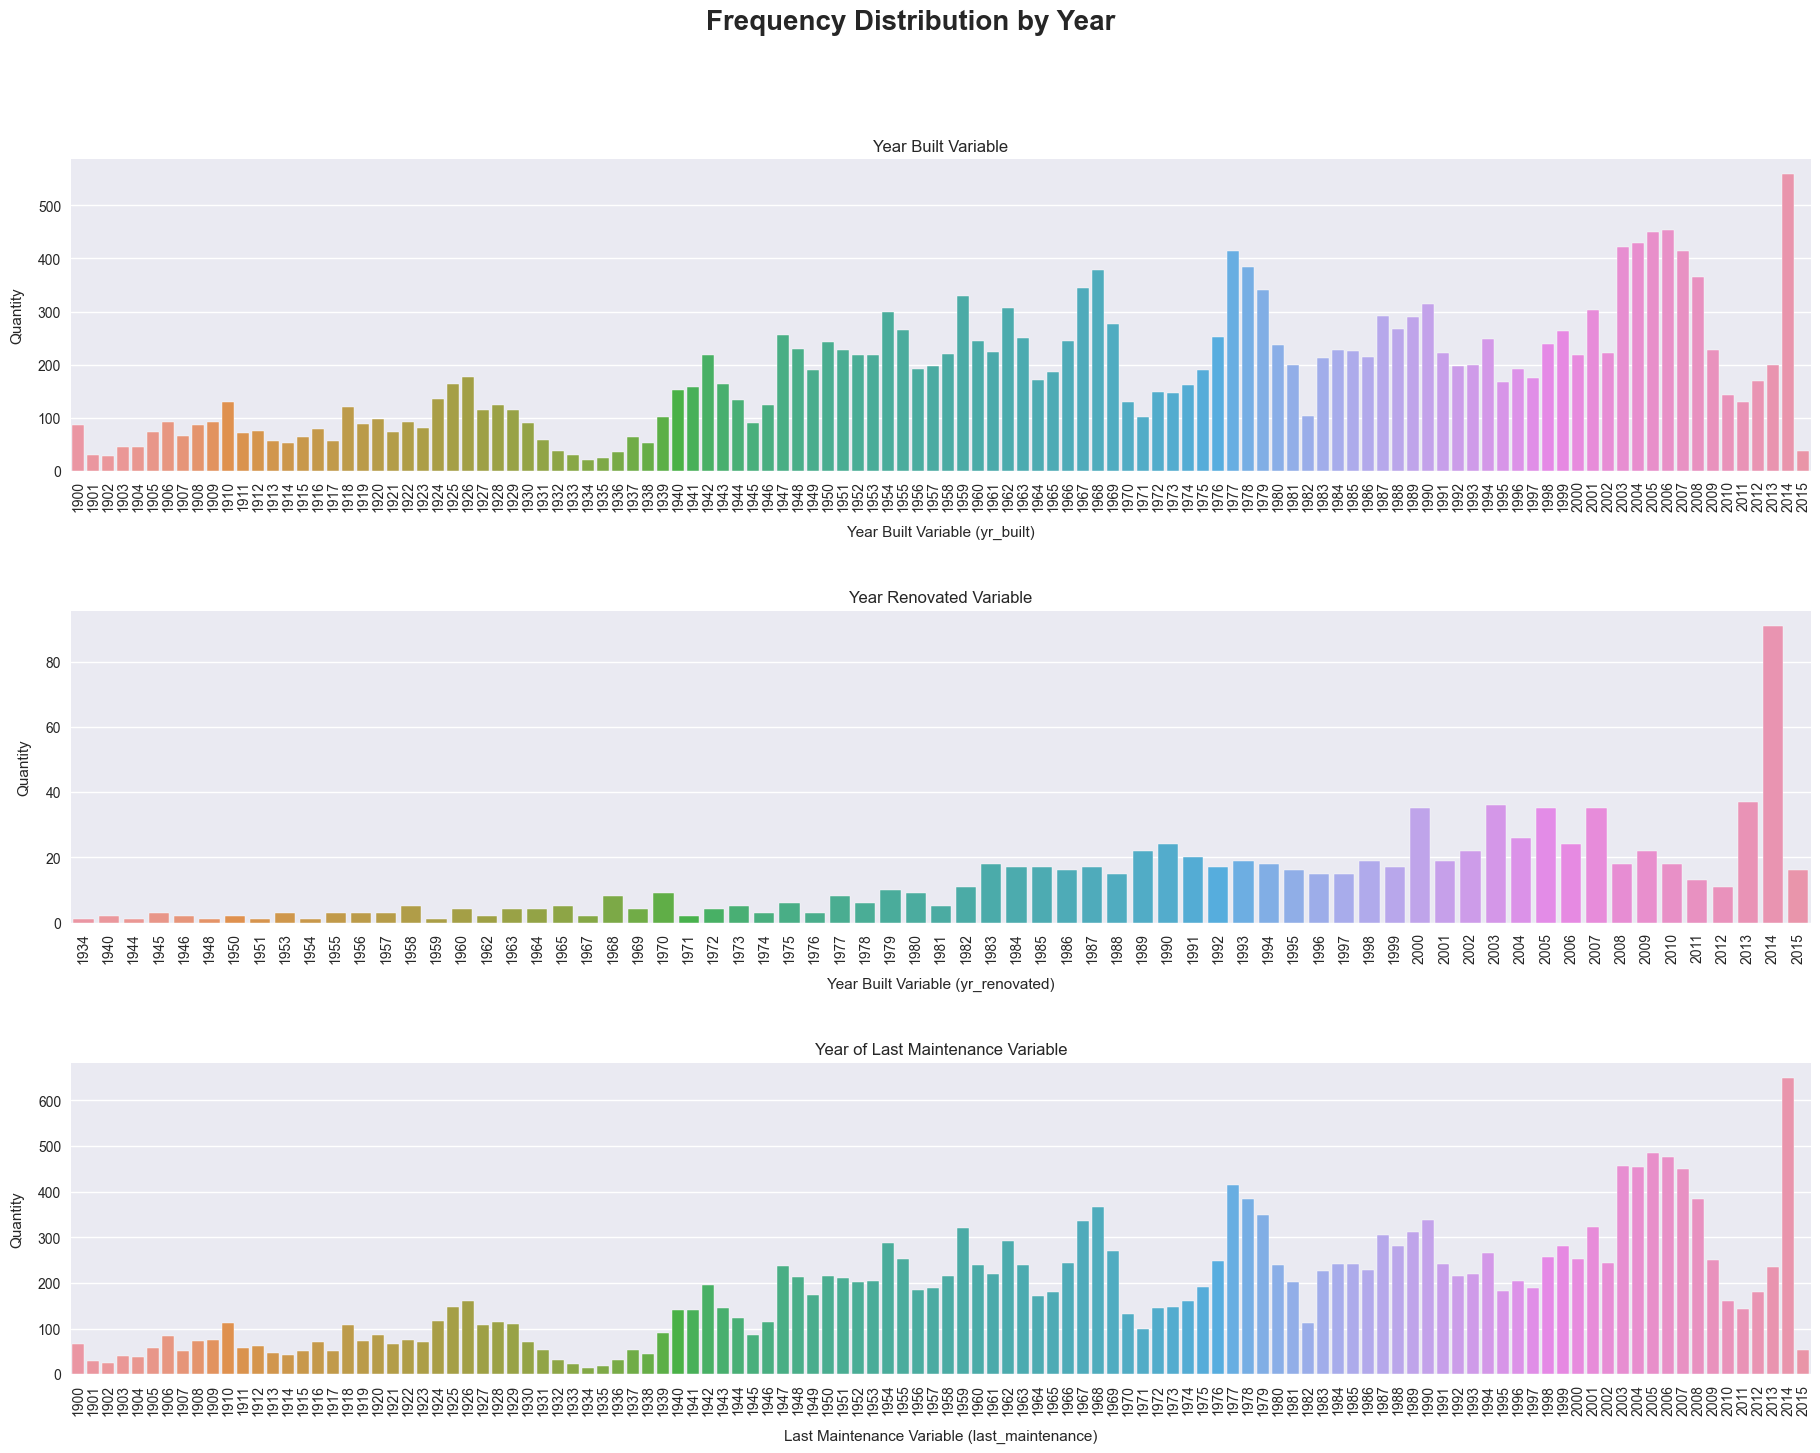

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(20, 15))
fig.suptitle('Frequency Distribution by Year',fontsize = 20,fontweight =600)
plt.subplots_adjust(hspace=0.45)

#Plotando variável yr_built
ax[0].set_title('Year Built Variable')
gr = sns.countplot(ax=ax[0], x='yr_built', data=data)
ax[0].tick_params(axis='x', labelrotation=90)
gr.set_xlabel('Year Built Variable (yr_built)', labelpad=10)
gr.set_ylabel('Quantity', labelpad=10)


#Plotando variável yr_built
ax[1].set_title('Year Renovated Variable')
gr = sns.countplot(ax=ax[1], x='yr_renovated', data=data.loc[data['yr_renovated']>0])
ax[1].tick_params(axis='x', labelrotation=90)
gr.set_xlabel('Year Built Variable (yr_renovated)', labelpad=10)
gr.set_ylabel('Quantity', labelpad=10)

#Plotando variável yr_built
ax[2].set_title('Year of Last Maintenance Variable')
gr = sns.countplot(ax=ax[2], x='last_maintenance', data=data)
ax[2].tick_params(axis='x', labelrotation=90)
gr.set_xlabel('Last Maintenance Variable (last_maintenance)', labelpad=10)
gr.set_ylabel('Quantity', labelpad=10)

plt.show()

In [ ]:
total_houses = len(data)
reformed_houses = len(data.loc[data['yr_renovated']>0])
print(f'Of {total_houses}, we have {reformed_houses} reformed houses, which represents {round(reformed_houses/total_houses*100,2)}%.')

Of 21351, we have 906 reformed houses, which represents 4.24%.


In [ ]:
total_houses = len(data)
reformed_and_built_houses = len(data.loc[data['last_maintenance']==2014])
print(f'Of {total_houses}, we have {reformed_and_built_houses} reformed or built houses in 2014, which represents {round(reformed_and_built_houses/total_houses*100,2)}%.')

Of 21351, we have 650 reformed or built houses in 2014, which represents 3.04%.


##### Observations
- Of 21351, we have 906 reformed houses, which represents 4.24%.
- We had a peak of Renovated and Built houses on 2014.
- Of 21351, we have 650 reformed or built houses in 2014, which represents 3.04%.

#### 5.1.3. Remaining Quantity Variables

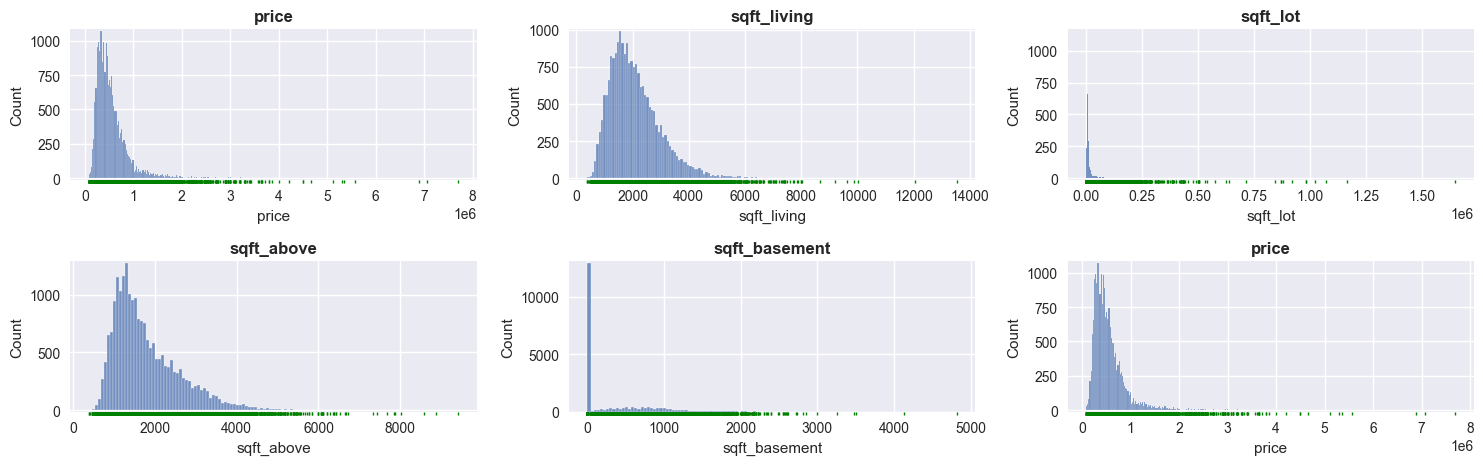

In [ ]:
df_quantity = data[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'price']]

fig = plt.figure(figsize=(15,5))
fig.suptitle('',fontsize = 20,fontweight =600)

for i, col in enumerate(df_quantity):
    ax = fig.add_subplot(2,3, i+1)
    ax.set_title(col,fontsize = 12,fontweight =600)
    sns.rugplot(x=data[col], ax=ax, height=-.02, clip_on=False, color='green')
    gr = sns.histplot(x=data[col], ax=ax)

fig.tight_layout()  

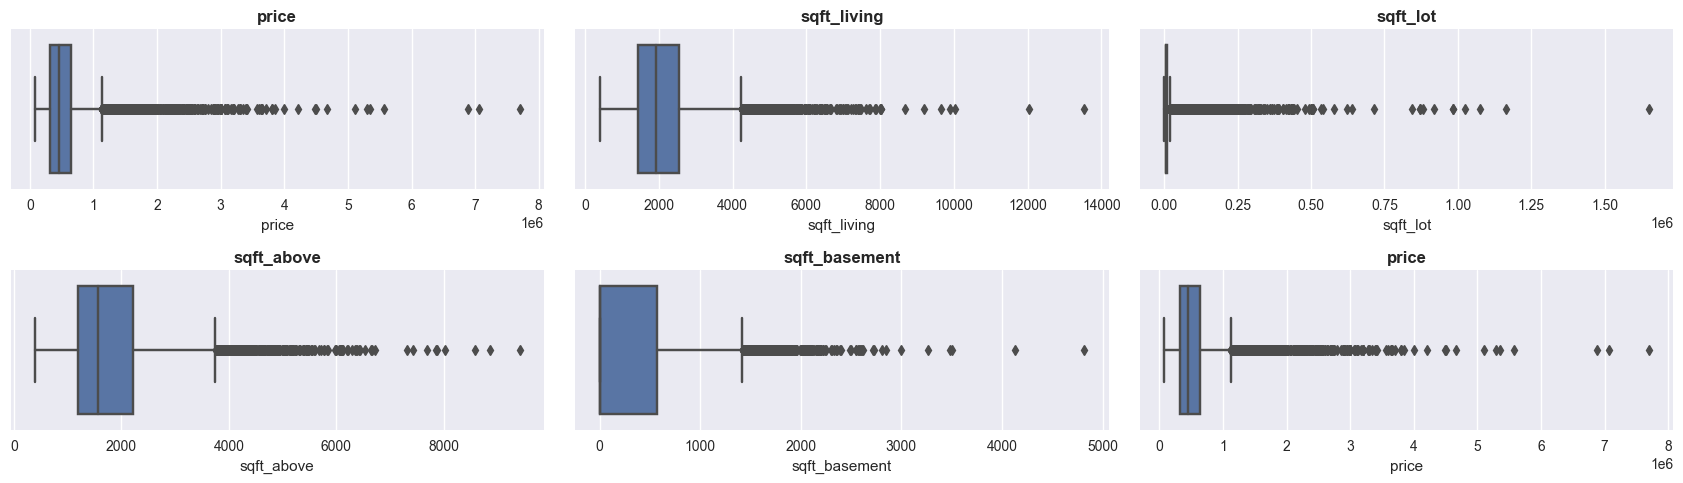

In [ ]:
df_quantity = data[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'price']]

fig = plt.figure(figsize=(17,5))

for i, col in enumerate(df_quantity):
    ax = fig.add_subplot(2,3, i+1)
    ax.set_title(col,fontsize = 12,fontweight =600)
    gr = sns.boxplot(x=data[col], ax=ax)

fig.tight_layout()

### 5.2. Quality Variables

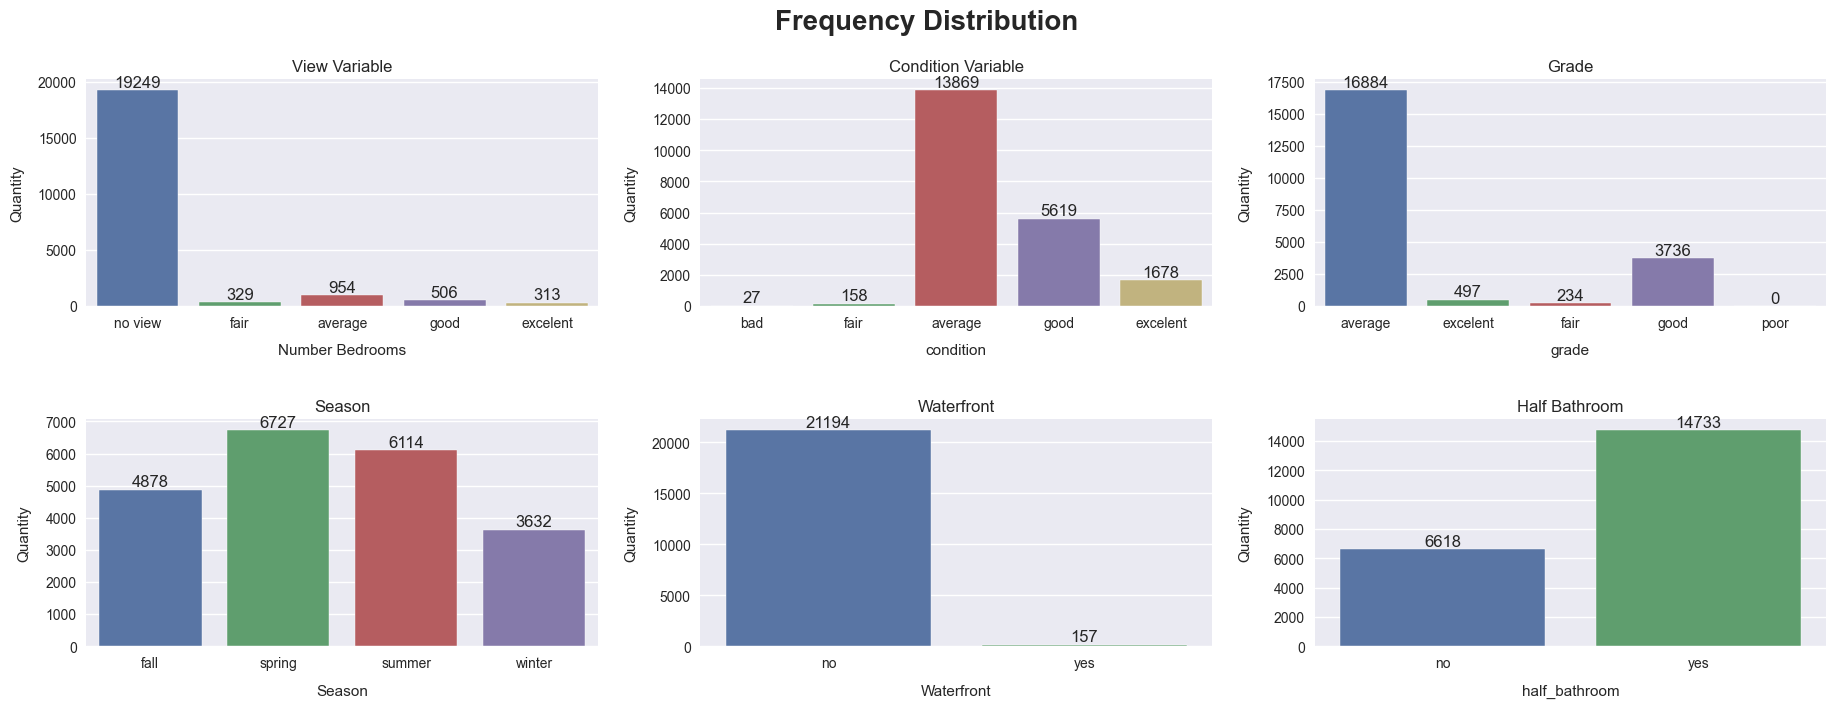

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20, 7))
fig.suptitle('Frequency Distribution',fontsize = 20,fontweight =600)
plt.subplots_adjust(hspace=0.5)

# Bedrooms Graphic
gr = sns.countplot(ax=ax[0,0], x='view', data=data)
gr.set_title('View Variable')
gr.bar_label(gr.containers[0], label_type='edge')
gr.set_xlabel('Number Bedrooms', labelpad=10)
gr.set_ylabel('Quantity', labelpad=10)

# condition Graphic
gr = sns.countplot(ax=ax[0,1], x='condition', data=data)
gr.set_title('Condition Variable')
gr.bar_label(gr.containers[0], label_type='edge')
gr.set_xlabel('condition', labelpad=10)
gr.set_ylabel('Quantity', labelpad=10)

# waterfront Graphic
gr = sns.countplot(ax=ax[0,2], x='grade', data=data)
gr.set_title('Grade')
gr.bar_label(gr.containers[0], label_type='edge')
gr.set_xlabel('grade', labelpad=10)
gr.set_ylabel('Quantity', labelpad=10)

# waterfront Graphic
gr = sns.countplot(ax=ax[1,0], x='season', data=data)
gr.set_title('Season')
gr.bar_label(gr.containers[0], label_type='edge')
gr.set_xlabel('Season', labelpad=10)
gr.set_ylabel('Quantity', labelpad=10)

# waterfront Graphic
gr = sns.countplot(ax=ax[1,1], x='waterfront', data=data)
gr.set_title('Waterfront')
gr.bar_label(gr.containers[0], label_type='edge')
gr.set_xlabel('Waterfront', labelpad=10)
gr.set_ylabel('Quantity', labelpad=10)

# waterfront Graphic
gr = sns.countplot(ax=ax[1,2], x='half_bathroom', data=data)
gr.set_title('Half Bathroom')
gr.bar_label(gr.containers[0], label_type='edge')
gr.set_xlabel('half_bathroom', labelpad=10)
gr.set_ylabel('Quantity', labelpad=10)

plt.show()

In [ ]:
len(data)

21351

#### Observation:
- Most of Houses doesn't have View (90.15%)
- Most of Houses are in average, good or excelent conditions (99.13%)
- Most of Houses are in average or good grade (96.57%)
- Most of Houses were sold in season (31.50%)
- Most of Houses doesn't have waterfront (99.26%)
- Most of Houses have a Half Bathroom (69.00%)

### 5.3. Correlation

In [ ]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'season',
       'complete_bathrooms', 'half_bathroom', 'last_maintenance'],
      dtype='object')

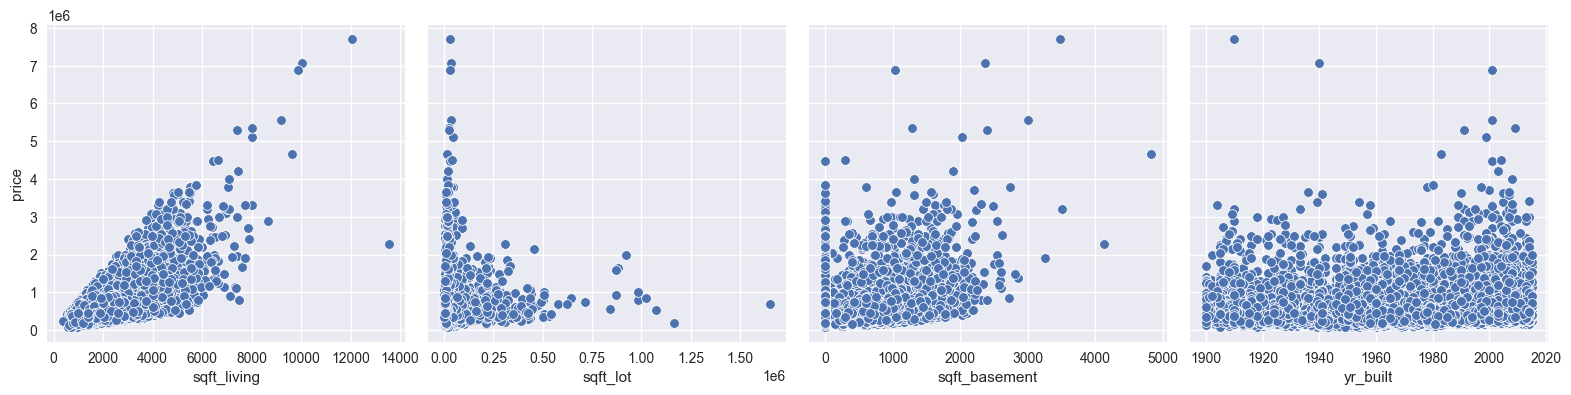

In [ ]:
sns.pairplot(data, x_vars=['sqft_living', 'sqft_lot', 'sqft_basement', 'yr_built'], y_vars=['price'], height=4)

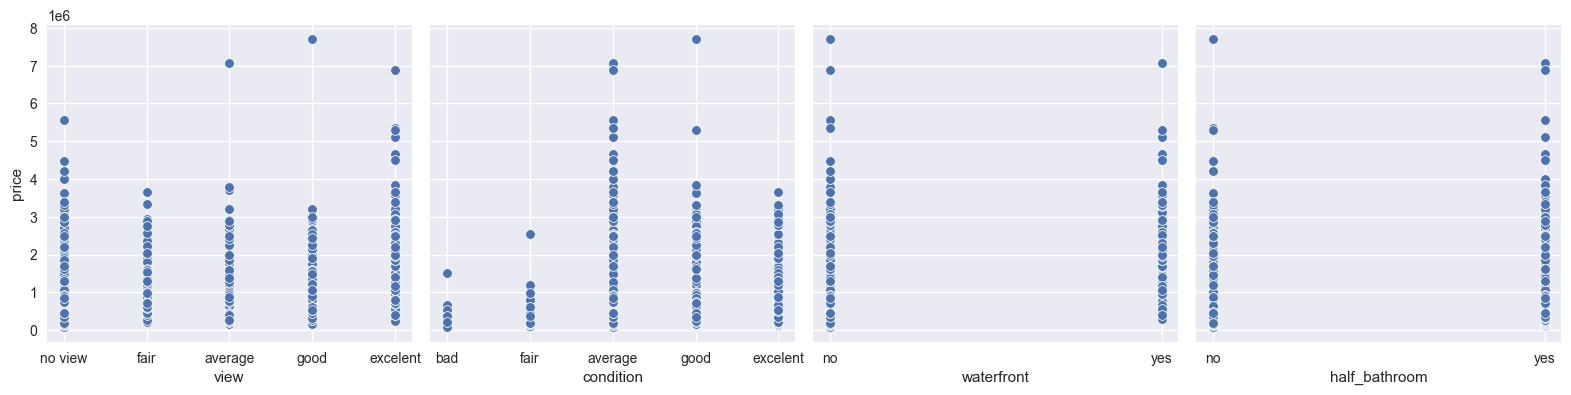

In [ ]:
sns.pairplot(data, x_vars=['view', 'condition', 'waterfront','half_bathroom'], y_vars=['price'], aspect=1, height=4)

<AxesSubplot: >

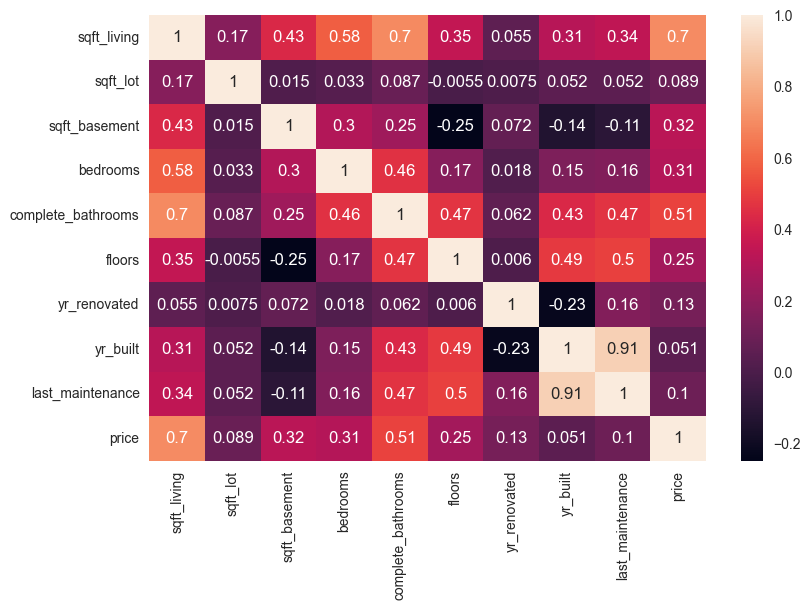

In [ ]:
sns.heatmap(data[['sqft_living', 'sqft_lot', 'sqft_basement','bedrooms','complete_bathrooms', 'floors', 'yr_renovated', 'yr_built','last_maintenance','price']].corr(), annot=True)

#### Observation:
- Price and sqft_living have a strong positive relation
- Complete Bathrooms also have a good positive relation, but it should happen because houses with more bathrooms, also have more sqft_living.

## 5. Insights

## 6. Conclusion

## 4. Feature Engeering